In [1]:
import numpy as np 
from matplotlib import pyplot as plt 

In [2]:
kb = 1.38064852e-23

In [3]:
def poly(x,a):
    val = sum([a[j]*(x**(j)) for j in range(1,len(a))])
    return val

### Routine for calculation of integral of a function

In [4]:
def integral(f,a_0,b_0,n,kind='simp'):
    h = (b_0-a_0)/n
    t0 = f(a_0)+f(b_0)

    if (kind=='simp'):
        t1 = sum([f(a_0+h*(2*k-1)) for k in range(1,int(n/2)+1)])
        t3 = sum([f(a_0+h*(2*k)) for k in range(1,int(n/2))])
        val = (h/3)*(t0+4*t1+2*t3)
    if(kind=='tpz'):
        t1 = sum([f(a_0+k*h) for k in range(1,n)])
        val = (h/2)*(t0+2*t1)
    return(val)

## Linear regression routine

In [5]:
def linear_regression(x,y,sigma):
    '''
    Fits data(x , y) for the linear function - 
    y = a1 + a2*x

    Use error propogation for calculation of 
    error in a1 and a1, using given error sigma

    returns a1,a1, error(a1) , error(a1)
    '''
    s = sum([1/(sig**2) for sig in sigma])
    sum_x = sum([(xi/(sigma_i**2)) for xi , sigma_i in zip(x,sigma)])
    sum_y = sum([(xi/(sigma_i**2)) for xi , sigma_i in zip(y,sigma)])
    sum_x_sq = sum([(xi**2/(sigma_i**2)) for xi , sigma_i in zip(x,sigma)])
    sum_x_y = sum([(xi*yi/(sigma_i**2)) for xi ,yi, sigma_i in zip(x,y,sigma)])

    # Parameters Calculation
    denom = s*sum_x_sq - (sum_x**2)
    a1 = (sum_y*sum_x_sq - sum_x*sum_x_y)/denom
    a2 = ( s*sum_x_y - sum_x*sum_y ) /denom

    # Error Calculation
    sigma_a1_sq = sum([(((sum_x_sq-x_i*sum_x))**2)/(sigma_i**2) for x_i,sigma_i in zip(x,sigma)])/(denom**2)
    sigma_a2_sq = sum([((s*x_i-sum_x)**2)/(sigma_i**2) for x_i , sigma_i in zip(x,sigma)])/(denom**2)

    err_a1 = sigma_a1_sq**0.5
    err_a2 = sigma_a2_sq**0.5


    return (a1,a2 , err_a1 , err_a2)


## Loading data 
energy is converted into J

In [6]:
data = np.loadtxt('QIIdata')
data_col = np.transpose(data)

#print(data.shape)
en_kev = data[:,0]
en = np.asarray([e*1.60218e-16 for e in en_kev])
fm = data[:,1]
del_fm = data[:,2]
ft = data[:,3]
del_ft = data[:,4]

## Part (I) Part(II)
taking log on both sides and linear fitting

In [7]:
log_fm = np.log(fm)
d_log_fm = np.asarray([(del_f/f) for del_f , f in zip(del_fm, fm)])

In [8]:
_ , a1 , _ , err_a1 = (linear_regression(en , log_fm , d_log_fm))
print(a1 , err_a1)

-4870625982560964.0 21382929316637.44


In [9]:
y_ft = [(1/np.log(f))**2  for f in ft]
d_y_ft = [(-2*df)/(f*((np.log(f))**3)) for df , f in zip(del_ft , ft)]
_ , a2 ,  _ , err_a2 = (linear_regression(en , y_ft , d_y_ft))
print(a2 , err_a2)

11942818631310.047 164482758744.3392


In [10]:
T = (-1/(a1*kb))
err_T = (1/(kb*a1**2))*err_a1
print('Temp estimated: {:.3e} K'.format(T))
print('error in temp estimated: {:.3e} K'.format(err_T))

Temp estimated: 1.487e+07 K
error in temp estimated: 6.529e+04 K


In [11]:
b = a2**(-0.5)
err_b = (-0.5)*(a2**(-(3/2)))*err_a2
print('b estimated: {:.3e} K'.format(b))
print('error in b estimated: {:.3e} K'.format(err_b))

b estimated: 2.894e-07 K
error in b estimated: -1.993e-09 K


## Part (III)

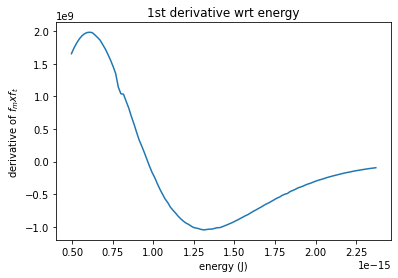

In [12]:
prod = np.asarray([f1*f2 for f1,f2 in zip(fm, ft)])
d_prod = []
for i in range(1,len(en)-1):
    del_en = (en[i+1]-en[i-1])/2
    d = (prod[i+1]-prod[i-1])/(2*del_en)
    d_prod.append(d)
en_d = en[1:-1]
plt.plot(en_d, d_prod)
plt.xlabel('energy (J)')
plt.ylabel('derivative of $f_mxf_t$')
plt.title('1st derivative wrt energy')
plt.show()

## Part IV

In [13]:
d2_prod = []
for i in range(1,len(en)-1):
    num = prod[i+1]-2*prod[i]+prod[i-1]
    del_en = (en[i+1]-en[i-1])/2
    denom = (del_en)**2
    d2 = num/denom
    d2_prod.append(d2)

In [14]:
def find_zero(y,x):
    zeros = []
    zero_index = []
    for i in range(len(x)-1):
        sign = y[i+1]*y[i]
        if(sign<0):
            zeros.append(x[i])
            zero_index.append(i)
    return zeros , zero_index
en_zero , index_zero = (find_zero(d_prod , en_d))
print('Zero of derivative occurs at:{} J'.format(en_zero))
print('value of 2nd derivative at this point: {:.2e}'.format(d2_prod[index_zero[0]]))

Zero of derivative occurs at:[9.61308e-16] J
value of 2nd derivative at this point: -7.09e+24


## Part V

In [15]:
fm_th  = np.exp(-(1/(kb*T))*en)
ft_th  = np.exp(-b/(en**0.5))
def calc_fm_th(en):
    fm_th  = np.exp(-(1/(kb*T))*en)
    return fm_tm

def calc_prod_th(en):
    val = np.exp(-en/(kb*T)-(b/(en**0.5)))
    return val


In [16]:
integ = []
for i in range(len(en)-1):
    del_en = en[i+1]-en[i]
    val = (prod[i+1]+prod[i])*(del_en/2)
    integ.append(val)
prod_integ = sum(integ)
print('area under curve for given data (product of ft*fm): {:.3e}'.format(prod_integ))

area under curve for given data (product of ft*fm): 7.471e-22


using simpson for calculating theoratical integral
energy range selected :energy range given in the data

In [17]:
prod_integ_th = integral(calc_prod_th , en[0],en[-1], len(en))
print('area under curve for theoratical estimated parameters: {:.3e}'.format(prod_integ_th))

area under curve for theoratical estimated parameters: 7.452e-22
